### CNN & 딥러닝 학습
    샘플이미지 분류 확인
    Confusion matrix
    F1 score

In [32]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 118s 1us/step


In [ ]:
from sklearn.model_selection import train_test_split
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.2, stratify= y_test)

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

### CNN

In [45]:
model = Sequential()
              #필터 갯수  #필터 사이즈  #몇칸씩 이동
model.add( Conv2D(32, kernel_size=(3, 3), strides=1, input_shape=(32, 32, 3),
                 activation = 'relu', padding='same') )
model.add( Conv2D(64, kernel_size=(3, 3), activation='relu') )
model.add( MaxPool2D(pool_size=(3, 3) ) )
model.add( Flatten() )
model.add( Dense( units=64, activation='relu'))
model.add( Dense( units=10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])
model.fit(x_train.reshape(50000, 32, 32, 3), y_trainOne, epochs=20, validation_data= (x_valid, y_valid), callbacks= [earlyStop], workers= -1)

Epoch 1/20
1563/1563 [==============================] - 45s 29ms/step - loss: 2.2065 - acc: 0.4180
Epoch 2/20
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1984 - acc: 0.5777
Epoch 3/20
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9736 - acc: 0.6586
Epoch 4/20
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8087 - acc: 0.7176
Epoch 5/20
1563/1563 [==============================] - 43s 27ms/step - loss: 0.6609 - acc: 0.7680
Epoch 6/20
1563/1563 [==============================] - 43s 27ms/step - loss: 0.5478 - acc: 0.8077
Epoch 7/20
1563/1563 [==============================] - 43s 28ms/step - loss: 0.4468 - acc: 0.8445
Epoch 8/20
1563/1563 [==============================] - 43s 27ms/step - loss: 0.3835 - acc: 0.8696
Epoch 9/20
1563/1563 [==============================] - 43s 27ms/step - loss: 0.3291 - acc: 0.8881
Epoch 10/20
1563/1563 [==============================] - 43s 28ms/step - loss: 0.2795 - acc: 0.9037
Epoch 11/

#### test

In [69]:
x_test.reshape(-1,32,32,3)

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [70]:
pred = model.predict(x_test.reshape(-1,32,32,3)/255).argmax(axis=1)

In [71]:
pred

array([3, 8, 0, ..., 5, 1, 7], dtype=int64)

In [72]:
y_test[0]

array([3], dtype=uint8)

#### confusion matrix

In [73]:
conf_mat = confusion_matrix( y_test, model.predict( x_test.reshape(-1,32,32,3)/255 ).argmax(axis=1))
conf_mat

array([[677,  32,  64,  21,  27,  10,  12,  17,  74,  66],
       [ 51, 779,   6,  11,   3,   6,   5,  12,  23, 104],
       [ 94,  19, 499,  65,  97,  84,  47,  51,  26,  18],
       [ 44,  33, 109, 325, 105, 186,  56,  69,  26,  47],
       [ 53,  13, 107,  87, 497,  71,  44,  97,  12,  19],
       [ 23,  15,  93, 154,  63, 510,  27,  71,  23,  21],
       [ 20,  21,  76,  87, 114,  65, 566,  23,  10,  18],
       [ 30,  20,  52,  37,  62,  82,   8, 657,   6,  46],
       [119,  56,  27,  18,  12,  10,   6,   7, 684,  61],
       [ 53, 134,  10,  12,  12,  11,   4,  15,  29, 720]], dtype=int64)

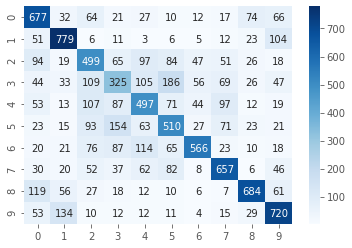

In [74]:
sns.heatmap( conf_mat, annot=True, fmt='d', cmap='Blues')
plt.show()

In [75]:
y_test.shape, pred.reshape(-1,1).shape

((10000, 1), (10000, 1))

In [76]:
y_test.shape

(10000, 1)

In [77]:
pred.shape

(10000,)

#### f1 score

In [78]:
f1 = f1_score(y_test, pred.reshape(-1,1), average= "macro")
print('f1 score :', f1)

f1 score : 0.5889276646271739


### 다른 모델(keras)

In [33]:
model2 = Sequential()
model2.add( Flatten(input_shape = (32,32,3)))
model2.add( Dense( units=128, activation='relu' ))
model2.add( Dense( units=64, activation='relu' ))
model2.add( Dense( units=32, activation='relu' ))
model2.add( Dense( units=10, activation='softmax' ))
model2.compile( loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'] )
h2 = model2.fit(x_train, y_train, epochs= 20, workers = -1)

#### test

In [ ]:
pred2 = model.predict(x_test.reshape(-1,32,32,3)/255).argmax(axis=1)

In [ ]:
pred2

In [ ]:
y_test[0]

#### confusion matrix

In [ ]:
conf_mat2 = confusion_matrix( y_test, model.predict( x_test.reshape(-1,32,32,3)/255 ).argmax(axis=1))
conf_mat2

In [ ]:
sns.heatmap( conf_mat2, annot=True, fmt='d', cmap='Blues')
plt.show()

#### f1 score

In [ ]:
f1 = f1_score(y_test, pred2.reshape(-1,1), average= "macro")
print('f1 score :', f1)